In [205]:
import os
import pandas as pd
import seaborn as sns
import datetime as dt
import pathlib
import matplotlib.pyplot as plt
from collections import Counter
import urllib
import numpy as np
import plotly.express as ex

In [233]:
my_path = '/Users/mjdelg/Desktop/tests/tiktok_scrape/data'
files = sorted(os.listdir(my_path))

def read_data():
    count1, count2 = 1, 1
    dataframes, dataframes2 = [], []
    for file in files:
        cur_path = my_path + '/' + file
        if 'csv' in file:
            # extract time and date of file creation
            path = pathlib.Path(cur_path)
            timestamp = path.stat().st_mtime
            my_time = dt.datetime.fromtimestamp(timestamp)
            # read in csv file into df
            df = pd.read_csv(cur_path)
            if "Cntrl" in file:
                dataframes.append(df)
                df['timegroup'] = count1
                count1 +=1
                df['Group'] = "Control"
            else:
                dataframes2.append(df)
                df['timegroup'] = count2
                count2 += 1
                df['Group'] = "Active"
            df['time'] = my_time
    return dataframes, dataframes2
df1, df2 = read_data()

In [234]:
control = pd.concat(df1)
active = pd.concat(df2)

In [235]:
combined = pd.concat(df1 + df2)
combined.time = pd.to_datetime(combined.time)
combined.time = combined.time.dt.round('s')
combined

,batch,index,music,hashtag,author,likes,comments,shares,saves,timegroup,Group,time
0,1,0,original sound - Gavin.kernstinee,igmirandahhmarie,mirandahshaul,407000,1752,44000,7058,1,Control,2024-02-12 19:43:24
1,1,1,original sound - leona mcanally,"fyp, fyp%E3%82%B7, foryou, foryoupage, tiktok",leona.mcanally,741000,43100,85400,337700,1,Control,2024-02-12 19:43:24
2,1,2,I Wouldnt Mind - ♱,"christiantiktok, christianhumor, christianjoke...",dangmattsmith,162600,2899,21000,671,1,Control,2024-02-12 19:43:24
3,1,3,original sound - Caicee Nichole 💞,NaN,nots4vo,70600,236,6552,294,1,Control,2024-02-12 19:43:24
4,1,4,original sound - Mr. There it go,"snowboardinggirl, skiergirl, gondola",venessanutz,297600,982,59100,4120,1,Control,2024-02-12 19:43:24
...,...,...,...,...,...,...,...,...,...,...,...,...
79,4,14,original sound - Morning Brew,", salarytransparency, salary, career, salaryne...",morningbrew,323900,964,18300,2017,20,Active,2024-02-15 18:44:56
80,4,15,original sound - Mona Kosar Abdi,@sasaja90,mokoab,14900,119,6799,662,20,Active,2024-02-15 18:44:56
81,4,16,original sound - Sarah Munyi,"sarahmunyi2024, lifecoachingtips, publicspeaki...",sarah_munyi,24500,427,2322,1422,20,Active,2024-02-15 18:44:56
82,4,17,Take Me to Mars - Xenia,"oxscaroundtheworld, oxfordsummercourses, summe...",oxfordsummercourses,2041,9,9,30,20,Active,2024-02-15 18:44:56


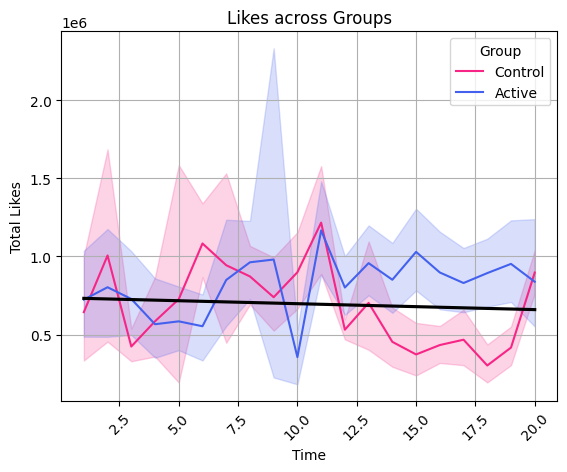

In [237]:
pal = ["#F72585", "#4361EE"]
likes = sns.lineplot(x='timegroup', y='likes', data = combined, hue = "Group", palette=pal)
sns.regplot(x='timegroup', y='likes',data=combined, scatter = None, ci=None, color="black")
plt.xticks(rotation=45)
likes.set(xlabel='Time',
       ylabel='Total Likes',
       title='Likes across Groups')
plt.grid()
plt.show()
#sns.countplot(data=combined, x = 'author')

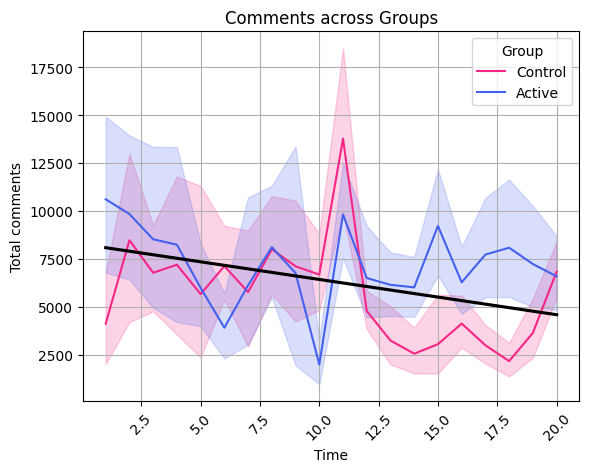

In [238]:
comments = sns.lineplot(x='timegroup', y='comments', data = combined, hue = "Group", palette=pal)
sns.regplot(x='timegroup', y='comments',data=combined, scatter = None, ci=None, color="black")
plt.xticks(rotation=45)
comments.set(xlabel='Time',
       ylabel='Total comments',
       title='Comments across Groups')
plt.grid()
plt.show()

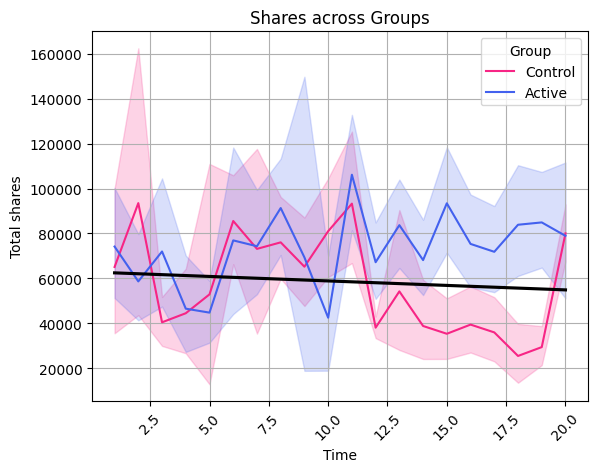

In [239]:
shares = sns.lineplot(x='timegroup', y='shares', data = combined, hue = "Group", palette=pal)
sns.regplot(x='timegroup', y='shares',data=combined, scatter = None, ci=None, color="black")
plt.xticks(rotation=45)
shares.set(xlabel='Time',
       ylabel='Total shares',
       title='Shares across Groups')
plt.grid()
plt.show()

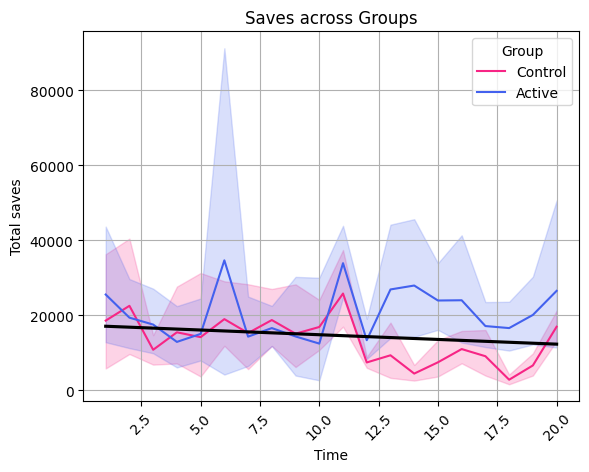

In [240]:
saves = sns.lineplot(x='timegroup', y='saves', data = combined, hue = "Group", palette=pal)
sns.regplot(x='timegroup', y='saves',data=combined, scatter = None, ci=None, color="black")
plt.xticks(rotation=45)
saves.set(xlabel='Time',
       ylabel='Total saves',
       title='Saves across Groups')
plt.grid()
plt.show()

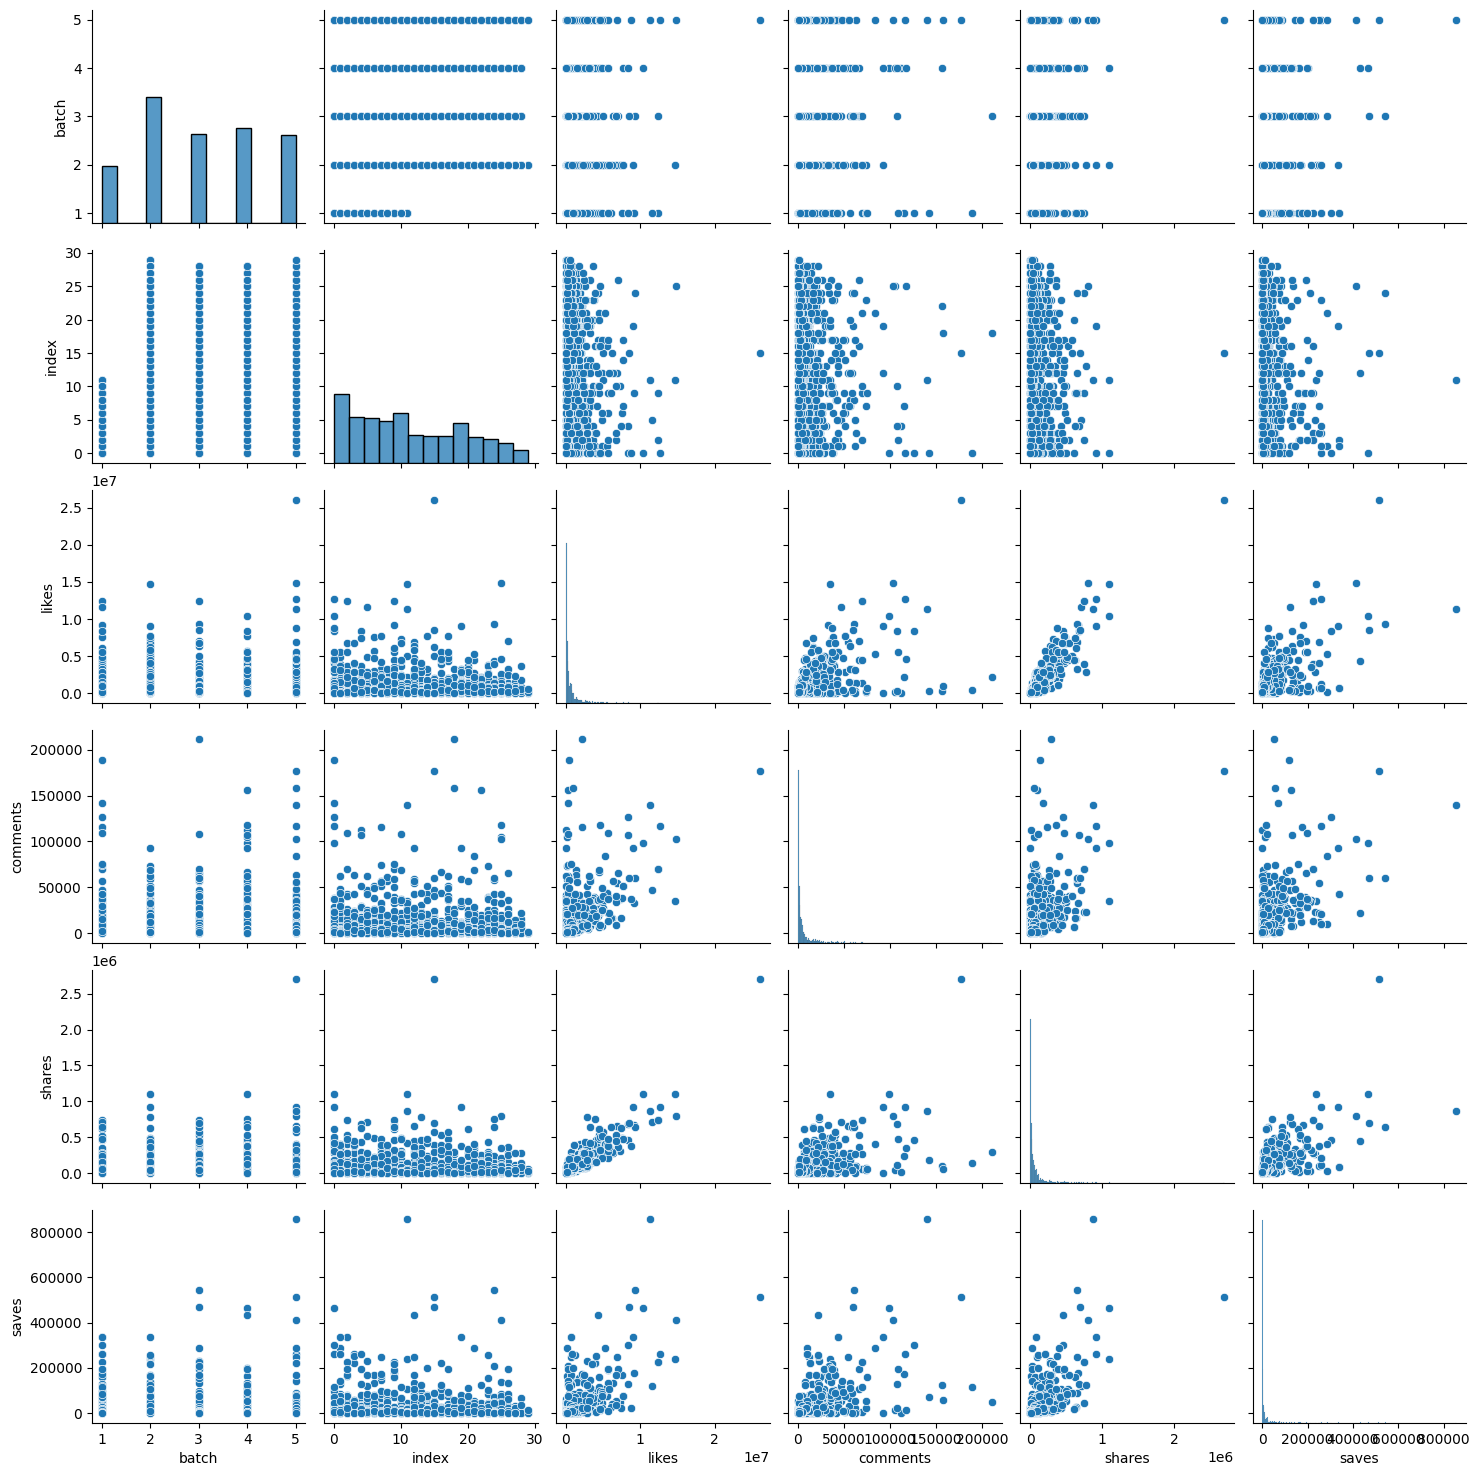

In [ ]:
sns.pairplot(combined)
plt.show()

In [178]:

allHashtagsCnt = Counter() # global variable that will be changed through the helper function
control_hash = Counter()
act_hash = Counter()
def countAllHashtags(cell, mode = "all"):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        if mode == "all":
            allHashtagsCnt.update(htList) # method update of Counter takes a list and updates all keys
        elif mode == "control":
            control_hash.update(htList)
        elif mode == "active":
            act_hash.update(htList)

In [179]:
_ = combined['hashtag'].apply(countAllHashtags)
_ = control['hashtag'].apply(countAllHashtags, mode="control")
_ = active['hashtag'].apply(countAllHashtags, mode="active")

In [260]:
allHashtagsCnt.most_common(10)
#control_hash.most_common(10)
#act_hash.most_common(10)
#print(urllib.parse.unquote('fyp%E3%82%B7'))
#print(urllib.parse.unquote('fyp%E3%82%B7%E3%82%9Aviral'))

[('fyp', 1544),
 ('viral', 720),
 ('parati', 582),
 ('foryou', 554),
 ('fyp%E3%82%B7', 496),
 ('foryoupage', 323),
 ('tiktok', 197),
 ('trending', 154),
 ('funny', 152),
 ('humor', 120)]

In [284]:
def get_set(data):
    hash = data.dropna(subset='hashtag')
    all_hash= hash['hashtag'].to_list()
    hashstr = ",".join(all_hash)
    hash_str = hashstr.split(',')
    return set(hash_str)

def get_intersec_hash(active, control):
    active_hash = get_set(active)
    control_hash = get_set(control)
    return active_hash.intersection(control_hash)
def jaccard_index(data, active, control):
    union = len(get_set(data))
    intersec = len(get_intersec_hash(active, control))
    return round(intersec/union,3)



In [285]:
combined_hash = combined.dropna(subset='hashtag')
df = combined_hash.groupby(['Group', 'timegroup'])

def get_jac_over_time():
    for i in range(1, 21):
        cur_control = df.get_group(('Control', i))
        cur_act = df.get_group(('Active', i))
        complete_group = combined_hash.groupby('timegroup')
        cur_jac = jaccard_index(complete_group, cur_act, cur_control)
        print(cur_jac)

get_jac_over_time()

AttributeError: 'SeriesGroupBy' object has no attribute 'to_list'

In [184]:
# Jaccard Index 
jaccard = intersec/union
jaccard

0.15265510849416639

In [258]:
combined['author_count'] = combined['author'].map(control['author'].value_counts())
combined['music_count'] = combined['music'].map(control['music'].value_counts())
c_music = combined.sort_values('music_count', ascending=False).drop_duplicates(subset='music').head(5)
c_music
m = ex.bar(c_music, x="music", y = "music_count", labels={
                     "music": "Music Sounds",
                     "music_count": "Total Counts"
                 },
                title="Top five sounds")
m

In [261]:
combined['author_count'] = combined['author'].map(control['author'].value_counts())
combined['music_count'] = combined['music'].map(control['music'].value_counts())
c_music = combined.sort_values('music_count', ascending=False).drop_duplicates(subset='music').head(5)
c_music
m = ex.bar(c_music, x="music", y = "music_count", labels={
                     "music": "Music Sounds",
                     "music_count": "Total Counts"
                 },
                title="Top five sounds")
m


In [262]:
combined.shape

(5766, 14)